In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [2]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

In [3]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
regions = pd.read_csv('noc_regions.csv')
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Joining the data frames

In [6]:
merged = pd.merge(data, regions, on='NOC', how='left')
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


Distribution of the age of gold medalists

Let’s start creating a new data frame including only gold medalists.

In [7]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


I would like to have a plot of the Age to see the distribution but I need to check first if the Age column contains NaN values

In [8]:
goldMedals.isnull().any()

,0
ID,False
Name,False
Sex,False
Age,True
Height,True
Weight,True
Team,False
NOC,False
Games,False
Year,False


Let’s take only the values that are different from NaN.

In [9]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

We will now create a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it.

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

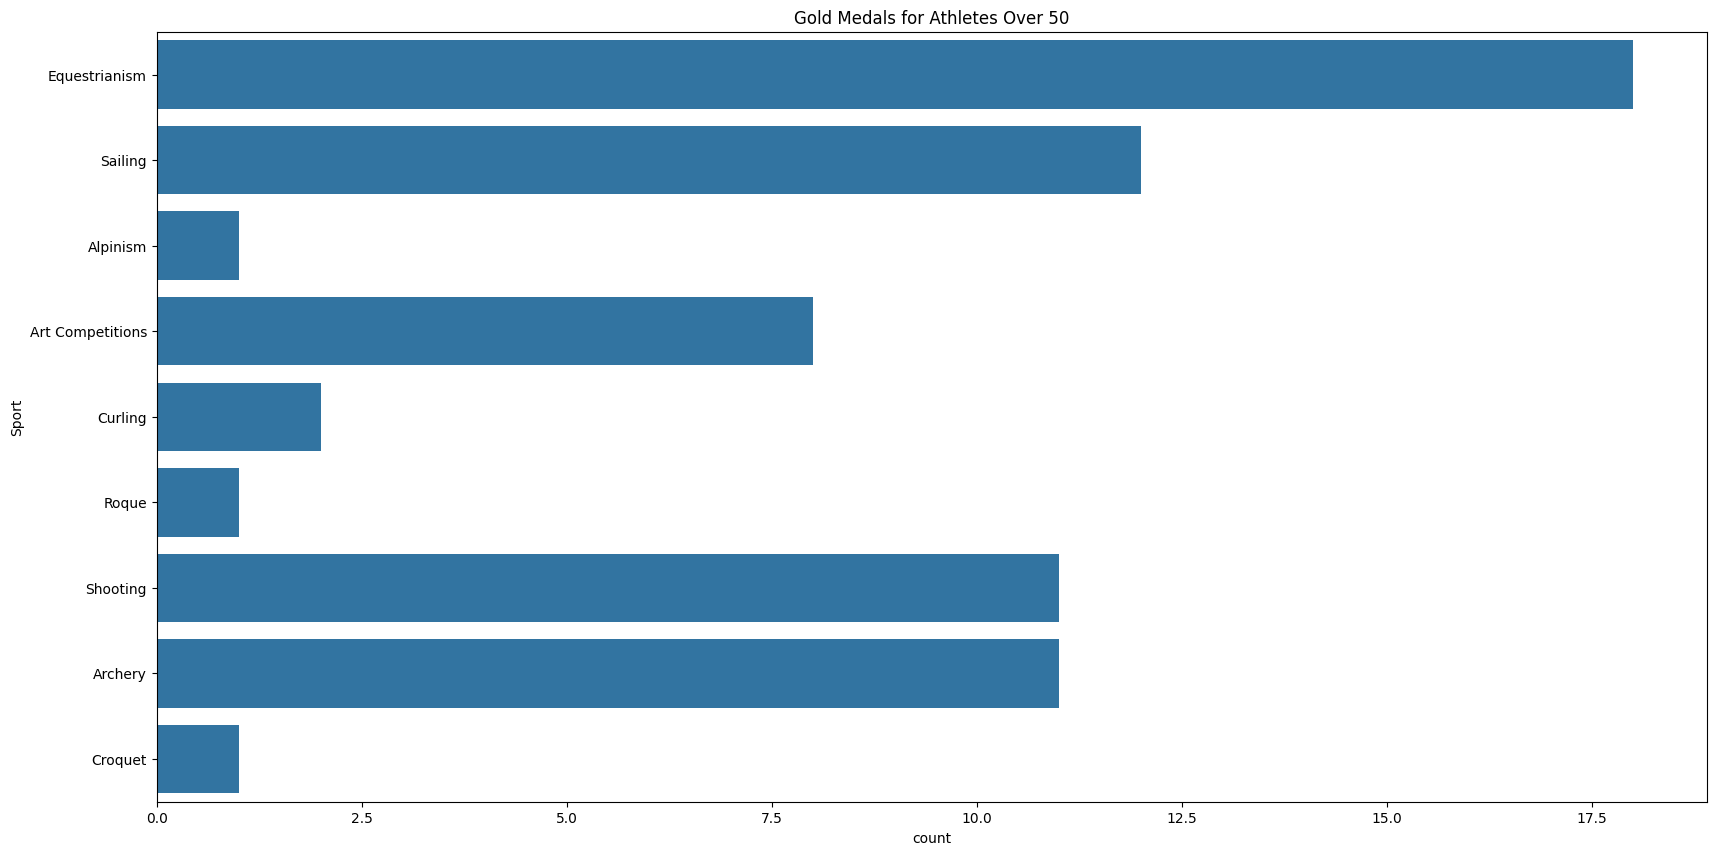

In [12]:

masterDisciplines = goldMedals['Sport'][goldMedals['Age'] > 50]
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDisciplines)
plt.title('Gold Medals for Athletes Over 50')

It seems that our senior gold medalists are shooters, archers, sailors and, above all, horse riders!
It makes sense: I cannot imagine a sprinter making 100 meters in 10 seconds at 55, but who knows!

Women in Athletics

Studying the data we can try to understand how much medals we have only for women in the recent history of the Summer Games. Let’s create a filtered dataset :

In [13]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]
womenInOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NaN
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN
136,49,Moonika Aava,F,28.0,168.0,65.0,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN


To plot the curve over time, let’s create a plot in which we put the year (on the x-axis) and count of the number of medals per edition of the games (consider that we will have more medals for the same athlete).

Text(0.5, 1.0, 'Women medals per edition of the Games')

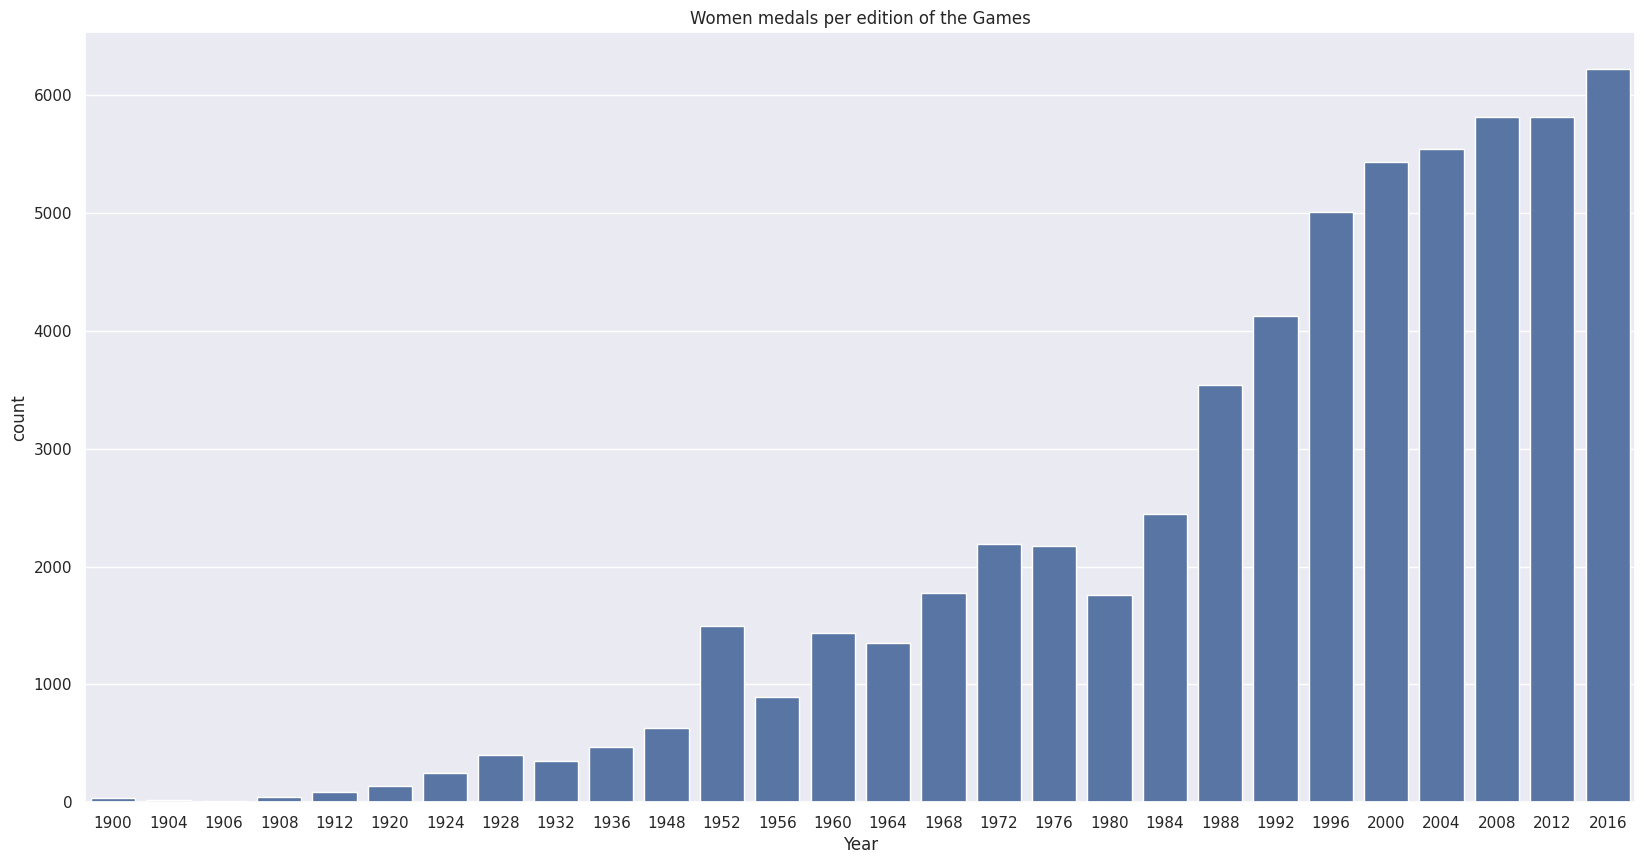

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

Usually I cross-check the data: below I tried to review only the medalists for the 1900 Summer edition to see if the visualization is correct.

In [15]:
womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN,Switzerland,NaN
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,NaN
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,NaN
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN,France,NaN


Okay, let’s count the rows (same code as above adding the count() function and filtering only for ID)¶

In [16]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

33

So we have 33 records (with repetitions, for example ‘Marion Jones (-Farquhar)’ won a medal both for Tennis Women’s Singles and Tennis Mixed Doubles – To be sure I cross-checked also with Wikipedia and the outcome seems correct).

Medals per country

Let’s now review the top 5 gold medal countries:

In [17]:
goldMedals.region.value_counts().reset_index(name='Medal').head()

,region,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Let’s plot this:

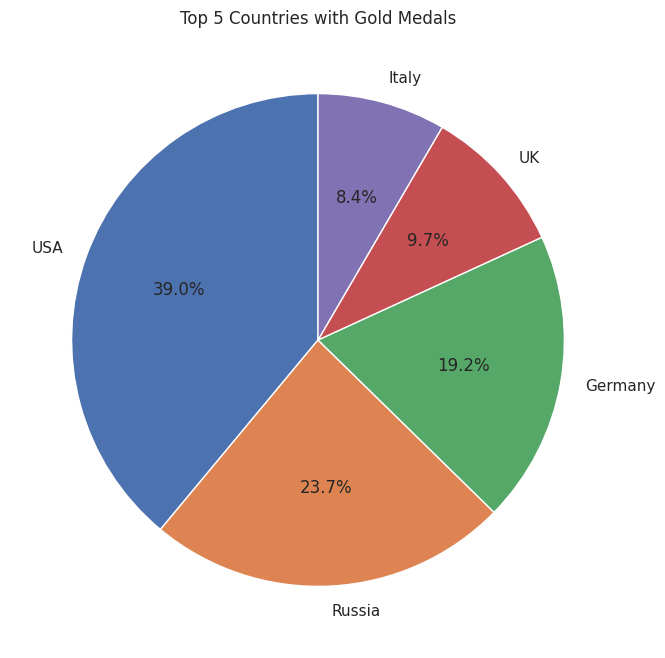

In [31]:
top_countries = goldMedals.region.value_counts().head()

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Countries with Gold Medals')
plt.show()

The USA seems to be the most winning country.

But which are the most awarded disciplines of American Athletes?

# Disciplines with the greatest number of Gold **Medals**

Let’s create a dataframe to filter the gold medals only for the USA

In [32]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

Done! Now, we can count the medals per discipline

In [33]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(20)

,Event,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


from matplotlib import pyplot as plt
_df_0['Medal'].plot(kind='hist', bins=20, title='Medal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Medal'].plot(kind='line', figsize=(8, 4), title='Medal')
plt.gca().spines[['top', 'right']].set_visible(False)

We will now create a dataframe filtering only the rows that has the column Height and Weight populated

In [34]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

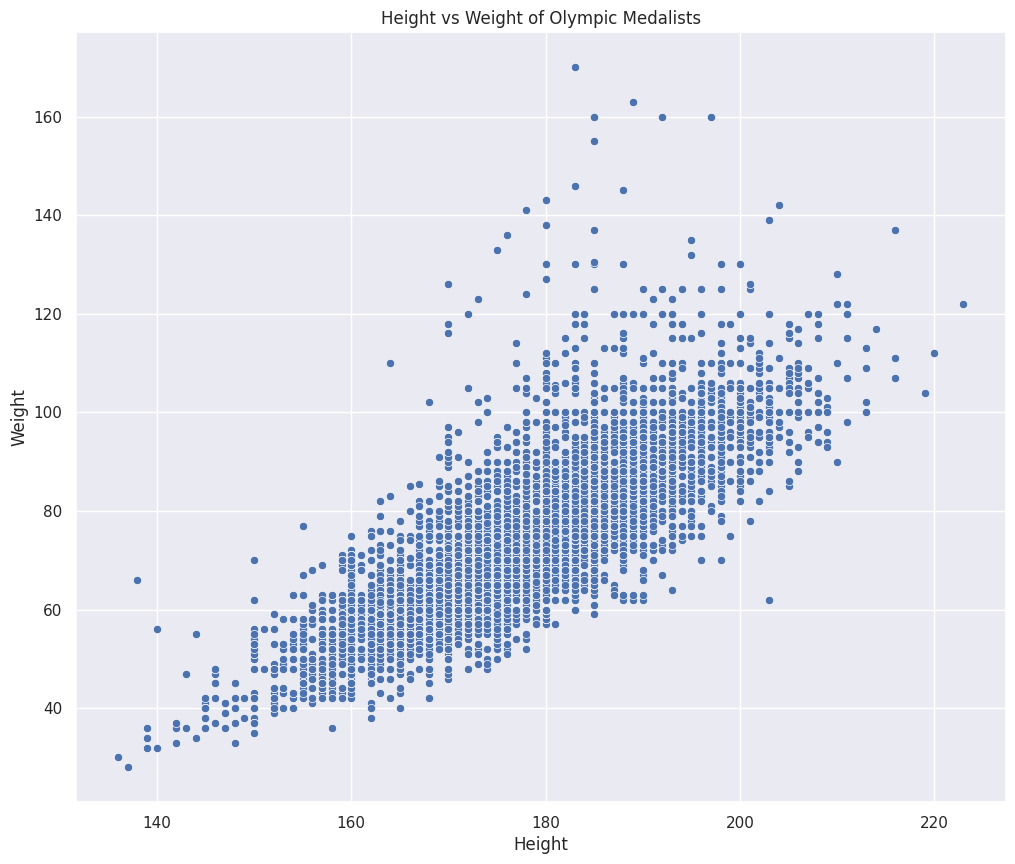

In [35]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')


# Weightlifting

Let’s work on an analysis similar to what we have done for Gymnastics also for the Lifters.

The vast majority of the samples show a linear relation between height and weight (the more the weight, the more the height).¶
We have exceptions and I am willing to know more!
For example, let’s see which is the athlete that weighs more than 160 kilograms.

In [37]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


In [38]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [39]:
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Text(0.5, 1.0, 'Variation of Male Athletes over time')

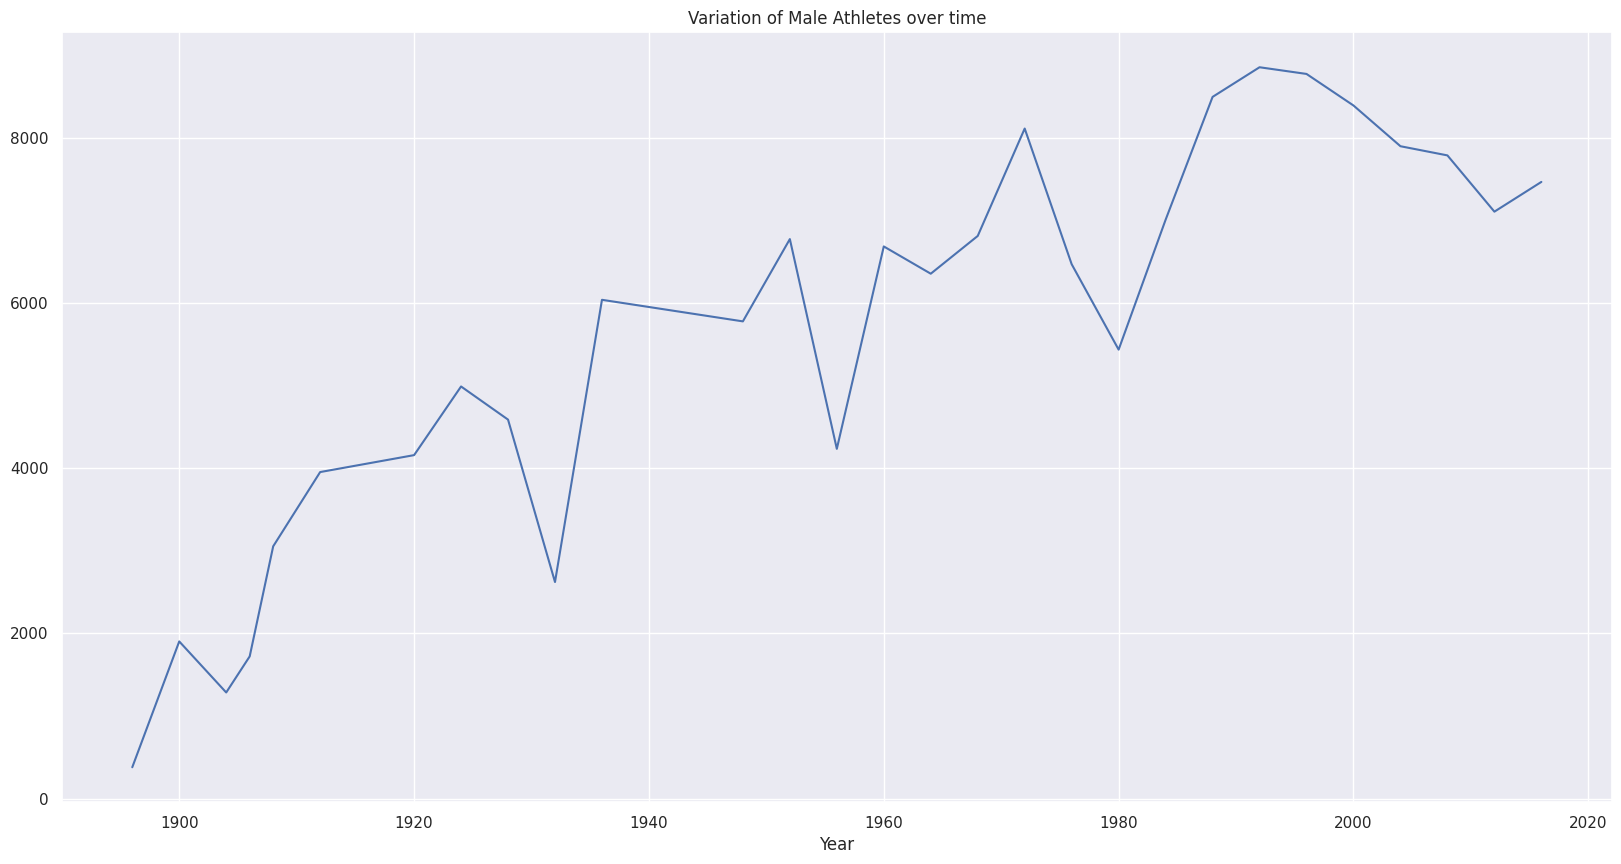

In [40]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

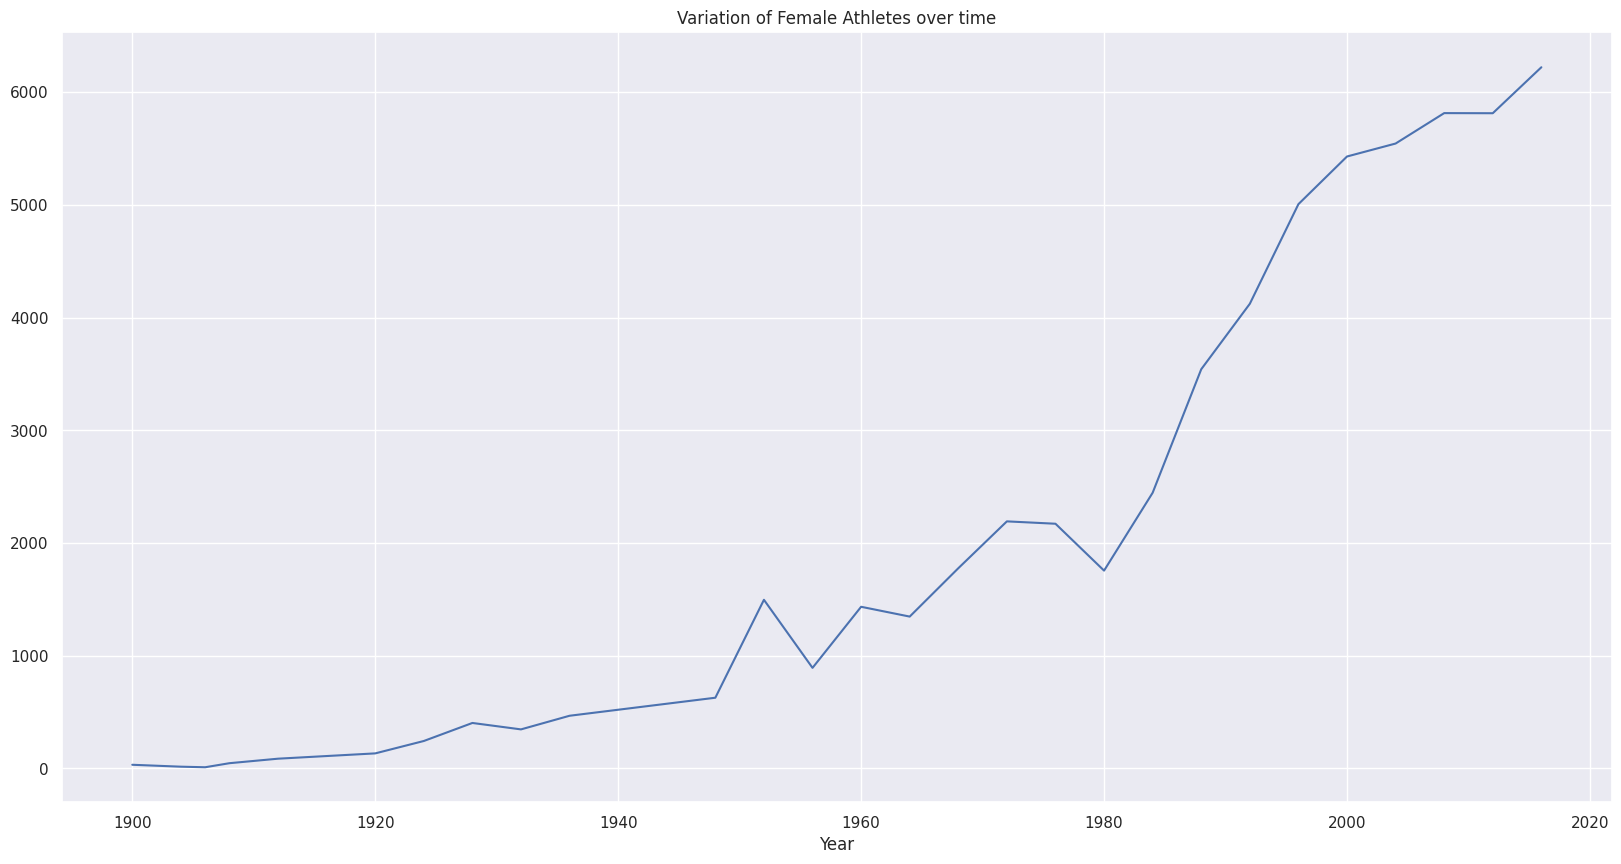

In [41]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

What I immediately saw is that for women:¶
We have a steep increase in the population;
The grow is constant.
On the other hand, the grow for men seems less strong:
After the 1990 we can see a relevant decrease in the number of male athletes at the summer games;
The growth has slowly restarted recently.

Generally, the age distribution starts has a lower minimum and a lower maximum;
In 1904 the age distribution is strongly different from the other Olympics: let’s know more about this point:

In [44]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


Let’s first of all isolate all the discipline of the Olympics dataframe.
My idea is to see if Gymnastics is called differently or if there is any type.

In [48]:
MenOverTime['Sport'].unique().tolist()


['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Swimming',
 'Badminton',
 'Gymnastics',
 'Athletics',
 'Art Competitions',
 'Wrestling',
 'Water Polo',
 'Sailing',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Weightlifting',
 'Diving',
 'Canoeing',
 'Handball',
 'Tennis',
 'Modern Pentathlon',
 'Hockey',
 'Volleyball',
 'Baseball',
 'Table Tennis',
 'Archery',
 'Trampolining',
 'Beach Volleyball',
 'Golf',
 'Rugby Sevens',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']


Okay, the string to use to filter is ‘Gymnastics’: let’s create two new dataframes for men and women.

In [49]:
gymMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Gymnastics']
gymWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Gymnastics']

Okay: let’s now create our plot for male and female athletes and then we can make our observations

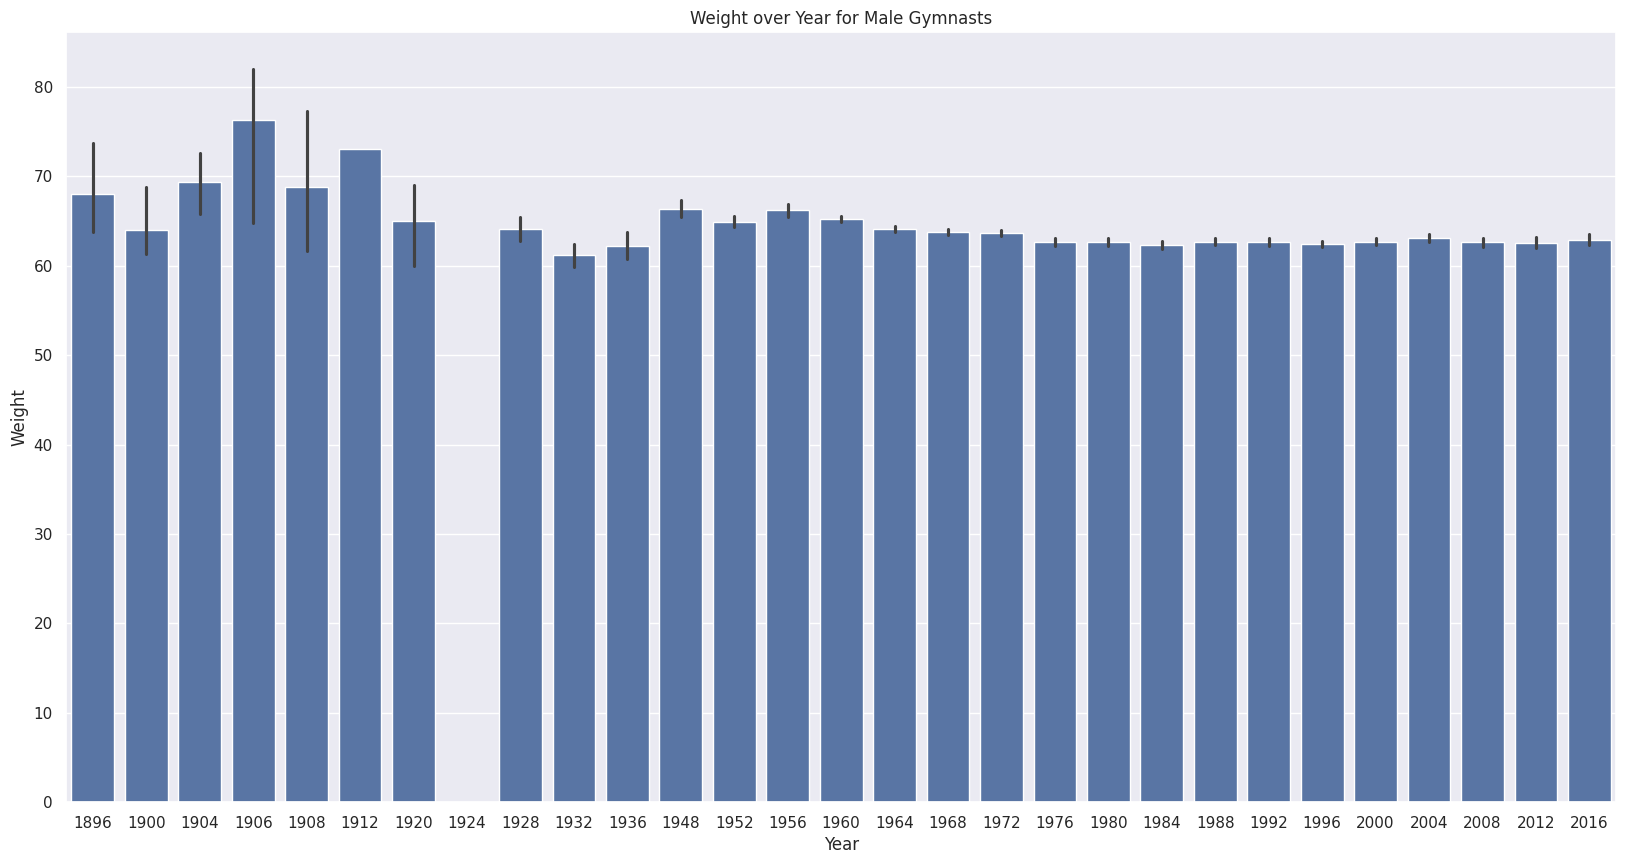

In [55]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Weight', data=gymMenOverTime)
plt.title('Weight over Year for Male Gymnasts')
plt.show()

The weight for female Gymnasts has go down for 60 to 50 kilograms on average;
The weight for men has been more or less stable since 1964;
The height is more stable for both men and women.  Also, men weight data from 1924 seems missing: let’s check.

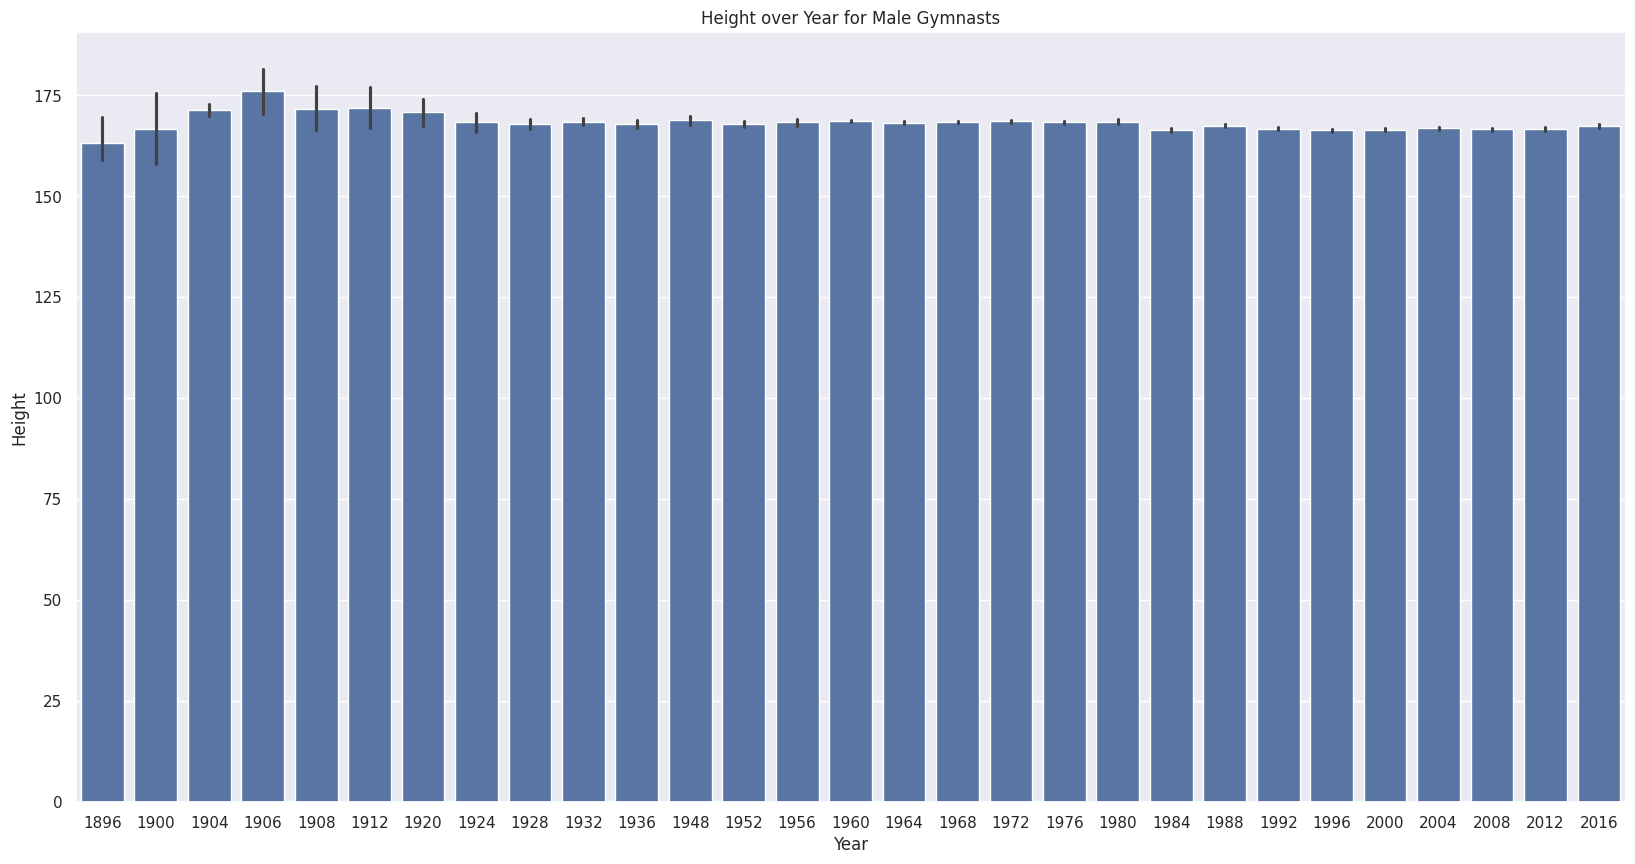

In [60]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Height', data=gymMenOverTime)
plt.title('Height over Year for Male Gymnasts')
plt.show()


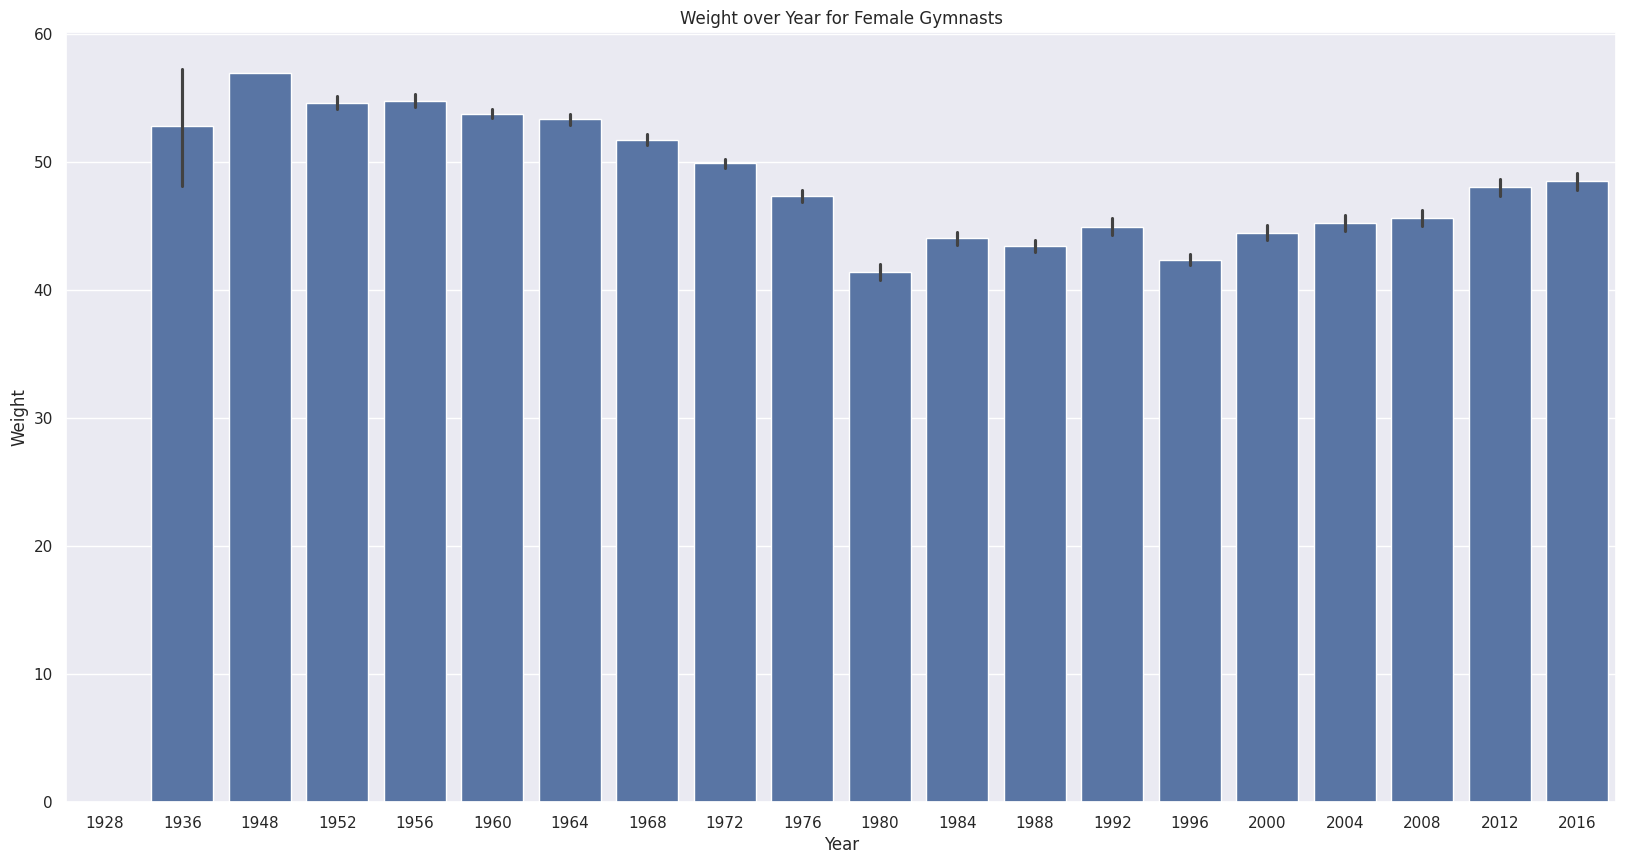

In [61]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Weight', data=gymWomenOverTime)
plt.title('Weight over Year for Female Gymnasts')
plt.show()

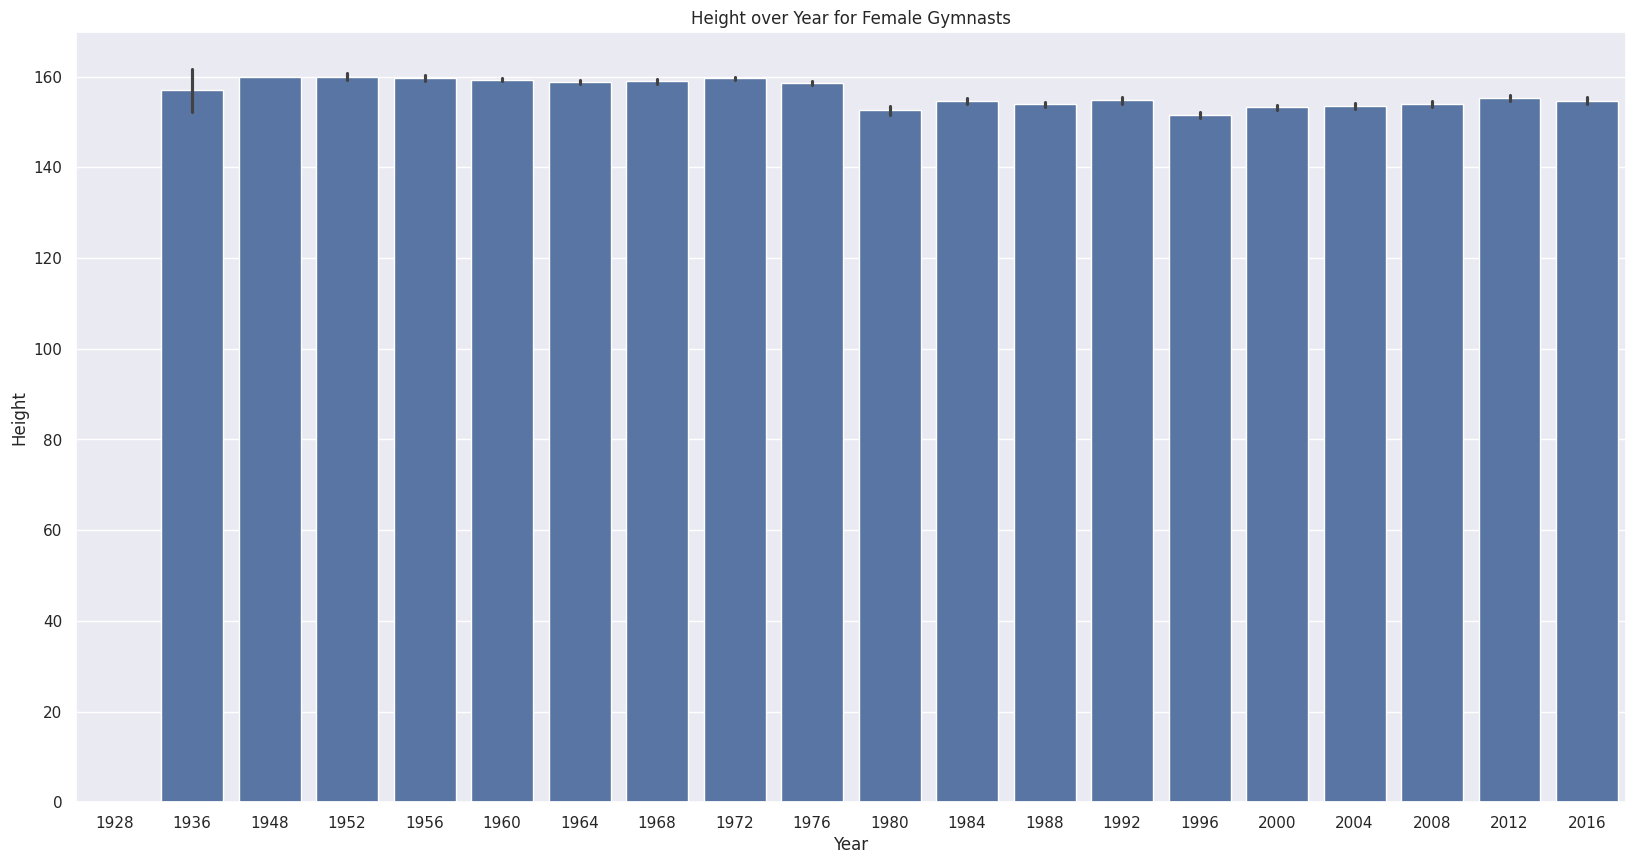

In [62]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year', y='Height', data=gymWomenOverTime)
plt.title('Height over Year for Female Gymnasts')
plt.show()

In [63]:
gymMenOverTime['Weight'].loc[gymMenOverTime['Year'] == 1924].isnull().all()

True

In [64]:
wlMenOverTime = MenOverTime.loc[MenOverTime['Sport'] == 'Weightlifting']
wlWomenOverTime = WomenOverTime.loc[WomenOverTime['Sport'] == 'Weightlifting']

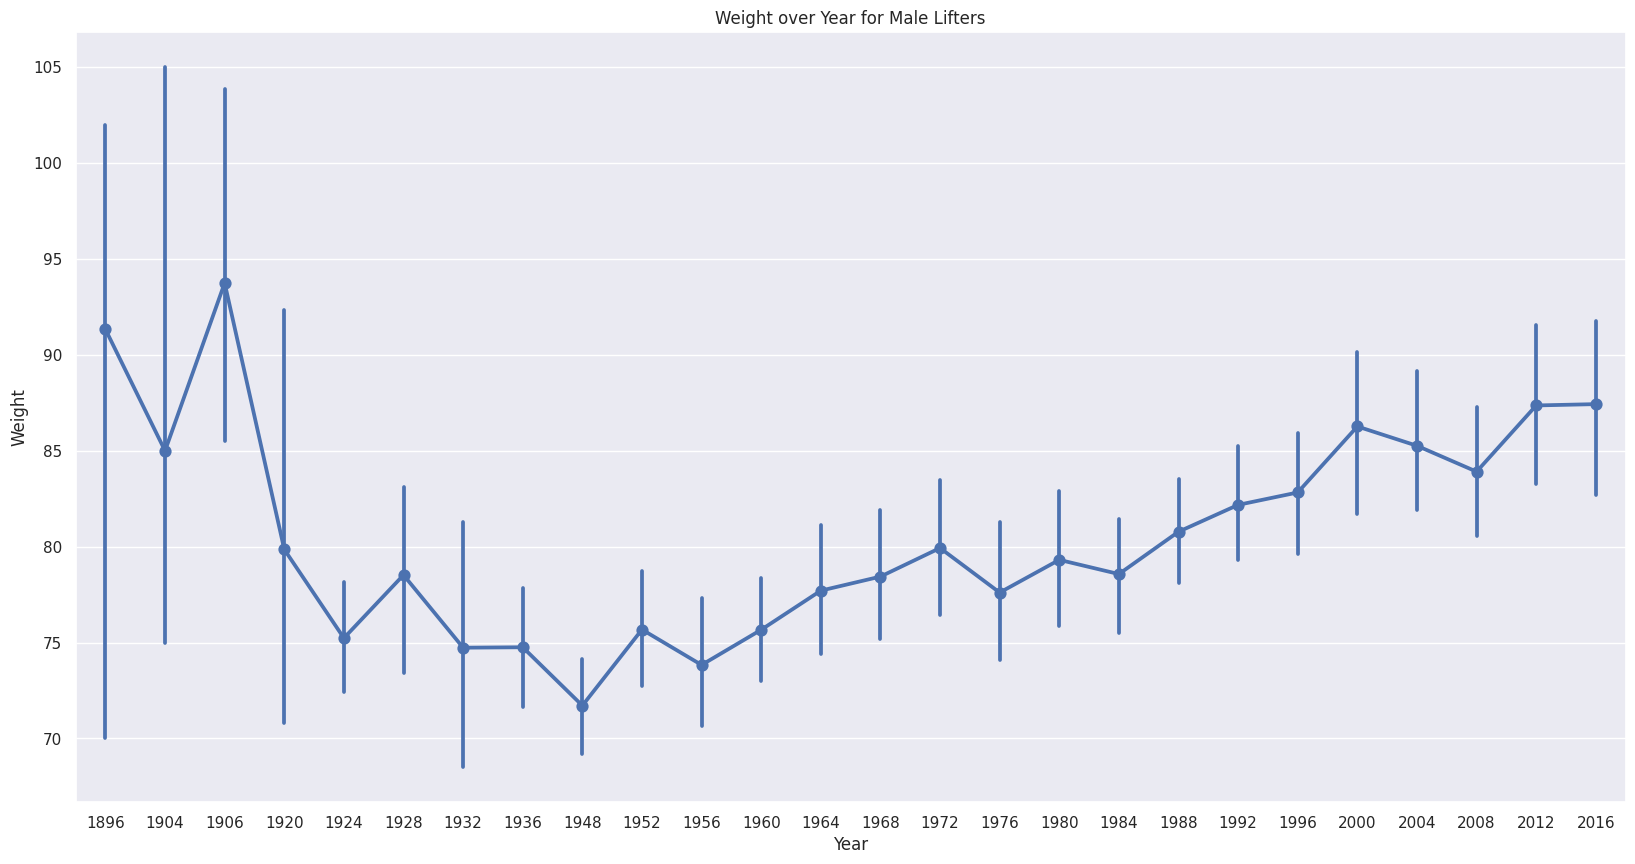

In [67]:
# prompt: create a point plot  Weight over year for Male Lifters

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Weight', data=wlMenOverTime)
plt.title('Weight over Year for Male Lifters')
plt.show()

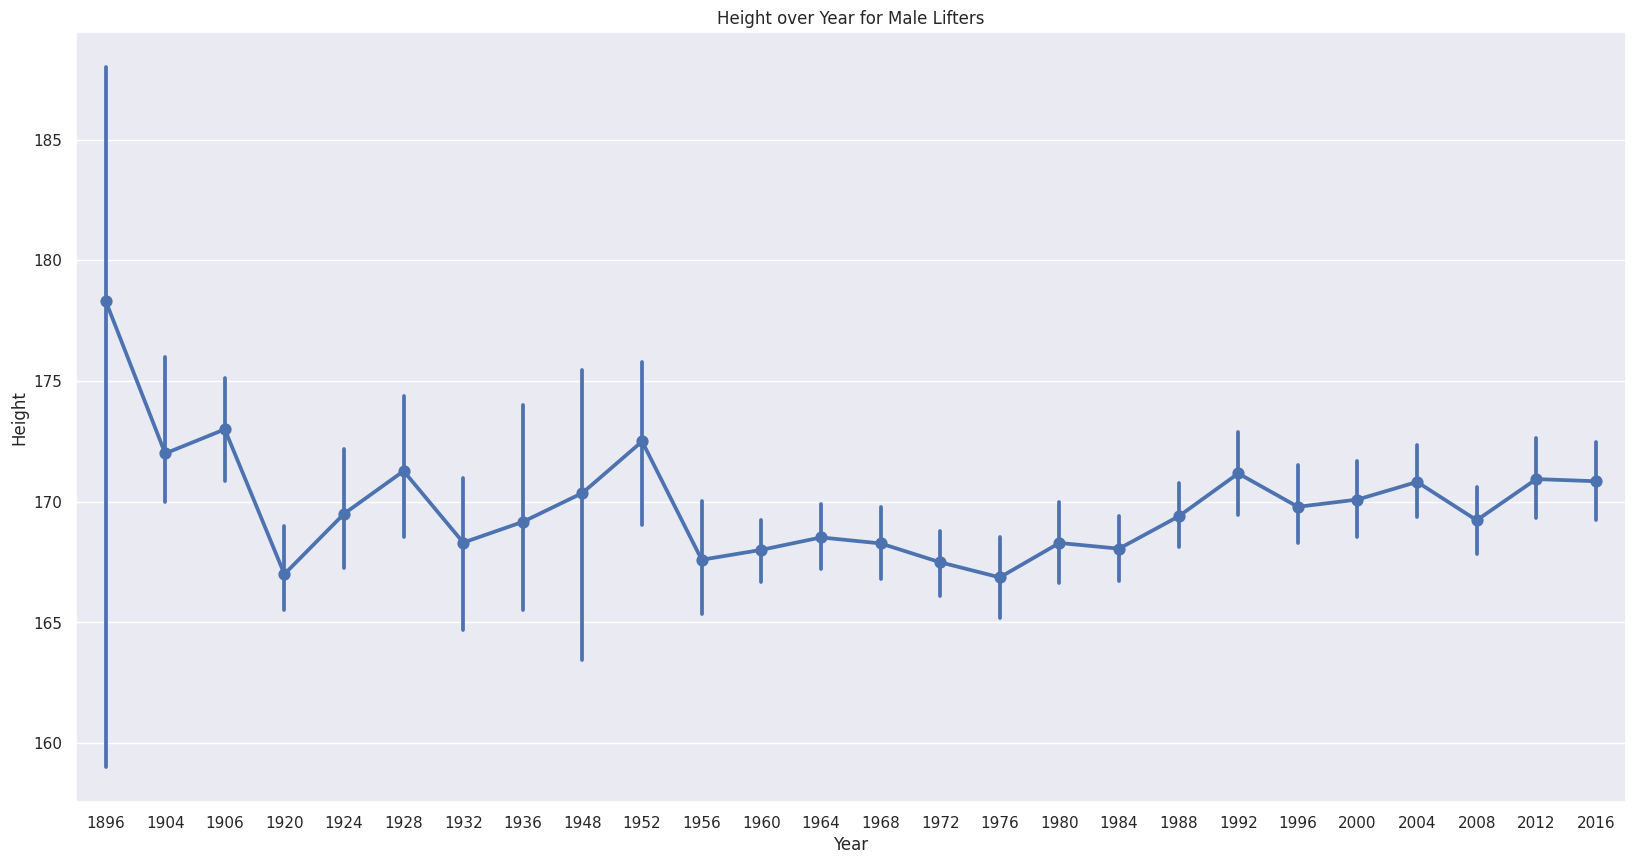

In [70]:
plt.figure(figsize=(20, 10))
sns.pointplot(x='Year', y='Height', data=wlMenOverTime)
plt.title('Height over Year for Male Lifters')
plt.show()